In [25]:
import pandas as pd
import os

# 현재 파이썬 코드의 파일 경로
current_path = os.getcwd()  # 현재 작업 디렉토리를 가져옵니다.

# CSV 파일 경로
file_path = os.path.join(current_path, 'filtered_data.csv')  # User uploaded fioytle to this path

df = pd.read_csv(file_path)
df

,note_id,person_id,age,gender_source_value,BMI,admission_department,division,ward,asa_class,surgeon_id,...,condition_source_value,surgery_room,previous_surgery,emergency_status,op_timing,day_of_the_week,week_of_the_month,month,surgeon_estimated_op_time,surgery_duration
0,101058,29,81,F,25.247087,General Surgery,Admission,NUGW2,2,9885,...,D00002196,203,N,N,TF2,Thursday,4,October,130,66
1,57801,64,60,F,24.376249,Otolaryngology,Admission,102,2,6194,...,D00003798,504,N,N,8A,Friday,2,January,300,130
2,71288,64,60,F,24.376249,Otolaryngology,Admission,102,3,6194,...,D00003798,504,Y,N,TF4,Monday,4,April,100,85
3,135104,64,60,F,24.376249,Otolaryngology,Admission,102,3,6194,...,D00003798,504,Y,N,TF2,Monday,3,August,100,83
4,221210,71,94,M,27.963140,Orthopedics,Admission,41,2,29473,...,D00018711,108,N,N,TF4,Monday,5,March,100,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161214,297111,4055249,1,M,23.700428,Pediatric Surgery,Admission,5A,1,100613,...,D00011688,5,N,Y,etc,Tuesday,2,September,200,123
161215,297455,4055328,1,M,20.612160,Pediatric Urology,Day,PDSC,1,6259,...,D00016707,7,N,N,8A,Monday,4,September,130,45
161216,297761,4055407,1,M,12.502703,Pediatric Surgery,Admission,5A,2,105057,...,D00011524,5,N,N,8A,Wednesday,3,September,130,43
161217,297753,4055558,4,F,14.365794,Pediatric Surgery,Admission,5A,2,105057,...,D00004831,5,N,N,TF6,Wednesday,3,September,130,82


dd

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 특정 컬럼의 분리 및 제거:
# 먼저 note_id, person_id, surgeon_estimated_op_time, final_op_name 컬럼을 데이터셋에서 제거합니다. 
# 이 컬럼들은 모델링에 필요하지 않거나 예측에 도움이 되지 않는 정보를 포함할 수 있습니다.
# Specific columns separation and removal
note_id = df['note_id']
person_id = df['person_id']
surgeon_estimated_op_time = df['surgeon_estimated_op_time']
df.drop(columns=['note_id', 'person_id', 'surgeon_estimated_op_time', 'final_op_name'], inplace=True)

# 범주형 데이터 인코딩:
# 범주형 데이터를 숫자로 변환하기 위해 인코딩을 수행합니다.
# 이진 인코딩(Binary Encoding), 원-핫 인코딩(One-Hot Encoding)
# Encoding categorical data
binary_cols = ['condition_source_value', 'op_code', 'surgeon_id', 'ward', 'admission_department', 'surgery_room']
for col in binary_cols:
    df[col] = df[col].astype('category').cat.codes

one_hot_cols = ['surgical_department', 'op_timing', 'month', 'anesthesia_type', 
                'day_of_the_week', 'asa_class', 'week_of_the_month', 
                'division', 'previous_surgery', 'emergency_status', 'gender_source_value']
df_encoded = pd.get_dummies(df, columns=one_hot_cols)

# 데이터 분할:
# X_all: 모델링에 사용할 모든 특성(features)을 포함합니다. surgery_duration을 제외한 모든 컬럼을 포함합니다.
# y_all: 예측하고자 하는 목표 변수(target variable), 즉 surgery_duration입니다.
# train_test_split: 데이터셋을 훈련 세트와 테스트 세트로 분할합니다. 일반적으로 80%의 데이터를 훈련에, 나머지 20%는 모델 성능 평가에 사용합니다. random_state=42를 설정하여 분할이 재현 가능하도록 합니다.
# Data splitting
X_all = df_encoded.drop("surgery_duration", axis=1)
y_all = df_encoded["surgery_duration"]
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Displaying the first few rows of the resulting dataframe
X_train_all.head(), y_train_all.head()


(        age        BMI  admission_department  ward  surgeon_id  op_code  \
 61344    60  19.477567                     8    64          34     2867   
 137241    3  19.953791                    23    29          19     1869   
 139478   57  22.486020                    12    26         123      471   
 113549    9  13.982958                    25    53          22     2553   
 149411   30  19.604579                    17     1          20     2699   
 
         condition_source_value  surgery_room  \
 61344                      501            15   
 137241                    3971            31   
 139478                    2449            34   
 113549                    2638            30   
 149411                    2206            26   
 
         surgical_department_Cardiovascular Thoracic Surgery  \
 61344                                               False     
 137241                                              False     
 139478                                              F

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Creating and training the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_all, y_train_all)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test_all)

# Evaluating the model
mae_rf = mean_absolute_error(y_test_all, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_all, y_pred_rf))

# Returning the evaluation metrics
mae_rf, rmse_rf

(34.04604403920109, 57.451605225030455)

In [9]:
# Calculating MAE and RMSE for surgeon_estimated_op_time against actual surgery_duration

# Extracting the corresponding surgeon_estimated_op_time values for the test set
surgeon_estimates_test = surgeon_estimated_op_time.iloc[y_test_all.index]

# Calculating the metrics
mae_surgeon = mean_absolute_error(y_test_all, surgeon_estimates_test)
rmse_surgeon = np.sqrt(mean_squared_error(y_test_all, surgeon_estimates_test))

mae_surgeon, rmse_surgeon

(70.7715854112393, 93.97561872515041)

In [12]:
# Getting the unique values of the 'surgical_department' column
departments = df['surgical_department'].unique()

# Separating Pediatric and Adult departments
pediatric_departments = [dept for dept in departments if 'Pediatric' in dept]
adult_departments = [dept for dept in departments if 'Pediatric' not in dept]

# Separating the dataset into pediatric and adult departments
pediatric_df = df[df['surgical_department'].isin(pediatric_departments)]
adult_df = df[df['surgical_department'].isin(adult_departments)]

# Checking the size of each subset and displaying a few rows
pediatric_count = pediatric_df.shape[0]
adult_count = adult_df.shape[0]

pediatric_count, adult_count

(29688, 131531)

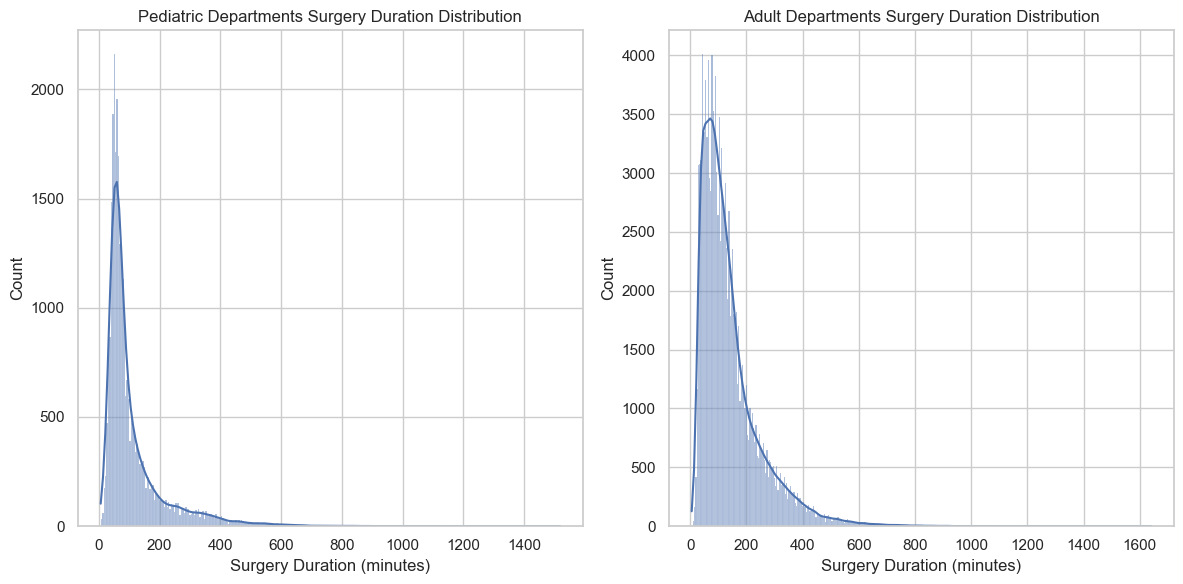

(count    29688.000000
 mean       111.856946
 std        106.708475
 min          6.000000
 25%         52.000000
 50%         72.000000
 75%        125.000000
 max       1518.000000
 Name: surgery_duration, dtype: float64,
 count    131531.000000
 mean        141.477226
 std         109.510659
 min           5.000000
 25%          67.000000
 50%         110.000000
 75%         178.000000
 max        1640.000000
 Name: surgery_duration, dtype: float64)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing the distribution of surgery_duration for pediatric and adult departments

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Descriptive statistics for surgery_duration in both subsets
desc_stats_pediatric = pediatric_df['surgery_duration'].describe()
desc_stats_adult = adult_df['surgery_duration'].describe()

# Plotting the distributions
plt.figure(figsize=(12, 6))

# Distribution for pediatric departments
plt.subplot(1, 2, 1)
sns.histplot(pediatric_df['surgery_duration'], kde=True)
plt.title('Pediatric Departments Surgery Duration Distribution')
plt.xlabel('Surgery Duration (minutes)')

# Distribution for adult departments
plt.subplot(1, 2, 2)
sns.histplot(adult_df['surgery_duration'], kde=True)
plt.title('Adult Departments Surgery Duration Distribution')
plt.xlabel('Surgery Duration (minutes)')

plt.tight_layout()
plt.show()

desc_stats_pediatric, desc_stats_adult



In [14]:
# Function to preprocess data
def preprocess_data(df):
    # Encoding categorical data
    # Binary encoding
    binary_cols = ['condition_source_value', 'op_code', 'surgeon_id', 'ward', 'admission_department', 'surgery_room']
    for col in binary_cols:
        df[col] = df[col].astype('category').cat.codes

    # One-hot encoding
    one_hot_cols = ['surgical_department', 'op_timing', 'month', 'anesthesia_type', 
                    'day_of_the_week', 'asa_class', 'week_of_the_month', 
                    'division', 'previous_surgery', 'emergency_status', 'gender_source_value']
    df_encoded = pd.get_dummies(df, columns=one_hot_cols)

    # Separating features and target variable
    X = df_encoded.drop("surgery_duration", axis=1)
    y = df_encoded["surgery_duration"]

    return X, y

# Preprocessing pediatric and adult datasets
X_pediatric, y_pediatric = preprocess_data(pediatric_df)
X_adult, y_adult = preprocess_data(adult_df)

# Splitting the data into training and testing sets
X_train_pediatric, X_test_pediatric, y_train_pediatric, y_test_pediatric = train_test_split(X_pediatric, y_pediatric, test_size=0.2, random_state=42)
X_train_adult, X_test_adult, y_train_adult, y_test_adult = train_test_split(X_adult, y_adult, test_size=0.2, random_state=42)

# Creating and training the Random Forest models
rf_model_pediatric = RandomForestRegressor(random_state=42)
rf_model_adult = RandomForestRegressor(random_state=42)

rf_model_pediatric.fit(X_train_pediatric, y_train_pediatric)
rf_model_adult.fit(X_train_adult, y_train_adult)

# Predicting on the test sets
y_pred_pediatric = rf_model_pediatric.predict(X_test_pediatric)
y_pred_adult = rf_model_adult.predict(X_test_adult)

# Evaluating the models
mae_pediatric = mean_absolute_error(y_test_pediatric, y_pred_pediatric)
rmse_pediatric = np.sqrt(mean_squared_error(y_test_pediatric, y_pred_pediatric))

mae_adult = mean_absolute_error(y_test_adult, y_pred_adult)
rmse_adult = np.sqrt(mean_squared_error(y_test_adult, y_pred_adult))

(mae_pediatric, rmse_pediatric), (mae_adult, rmse_adult)



C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_34608\4158719176.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category').cat.codes
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_34608\4158719176.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category').cat.codes


((30.596257999326376, 57.08965924984773),
 (34.80567814650094, 57.57247294583088))

In [15]:
# Getting unique departments from the dataset
unique_departments = df['surgical_department'].unique()

# Creating a dictionary to hold dataframes for each department
department_dfs = {dept: df[df['surgical_department'] == dept] for dept in unique_departments}

# Displaying the number of entries for each department
department_counts = {dept: len(dept_df) for dept, dept_df in department_dfs.items()}
department_counts

{'General Surgery': 36466,
 'Otolaryngology': 11772,
 'Orthopedics': 16617,
 'Ophthalmology': 17437,
 'Obstetrics & Gynecology': 11510,
 'Urology': 12741,
 'Plastic Surgery': 8460,
 'Neurosurgery': 7187,
 'Cardiovascular Thoracic Surgery': 9341,
 'Pediatric Otolaryngology': 5764,
 'Pediatric Orthopedics': 3905,
 'Pediatric Thoracic Surgery': 1876,
 'Pediatric Urology': 2975,
 'Pediatric Surgery': 4021,
 'Pediatric Ophthalmology': 7857,
 'Pediatric Plastic Surgery': 2124,
 'Pediatric Neurosurgery': 1166}

In [16]:
# Filtering out departments with very few data points
# Setting a threshold for minimum data points required for reliable model training
min_data_points = 30
filtered_departments = {dept: df for dept, df in department_dfs.items() if len(df) >= min_data_points}

# Preprocessing the data for each department
processed_data = {}
for dept, dept_df in filtered_departments.items():
    X, y = preprocess_data(dept_df)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    processed_data[dept] = (X_train, X_test, y_train, y_test)

# Training a Random Forest model for each department and evaluating performance
model_performance = {}
for dept, (X_train, X_test, y_train, y_test) in processed_data.items():
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    model_performance[dept] = (mae, rmse)

model_performance

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_34608\4158719176.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category').cat.codes
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_34608\4158719176.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category').cat.codes
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_34608\4158719176.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

{'General Surgery': (36.075016451878255, 55.102391310350605),
 'Otolaryngology': (46.04107430997877, 75.41370684543925),
 'Orthopedics': (35.14690132370637, 62.340983172485764),
 'Ophthalmology': (13.191344610091743, 21.969973732017763),
 'Obstetrics & Gynecology': (34.58925282363162, 55.05058369027021),
 'Urology': (24.493593566104355, 39.75118354875579),
 'Plastic Surgery': (41.7548463356974, 72.84074760207582),
 'Neurosurgery': (50.865660639777474, 74.93568857621989),
 'Cardiovascular Thoracic Surgery': (49.31286249331193, 70.21764622218893),
 'Pediatric Otolaryngology': (23.123599306157846, 42.53001613268344),
 'Pediatric Orthopedics': (49.44791293213829, 74.46293154234287),
 'Pediatric Thoracic Surgery': (53.943058510638295, 78.64908416605736),
 'Pediatric Urology': (37.39080672268907, 83.08855760496718),
 'Pediatric Surgery': (32.471726708074534, 60.35612484627909),
 'Pediatric Ophthalmology': (10.48979007633588, 14.633914140316588),
 'Pediatric Plastic Surgery': (33.905105882352

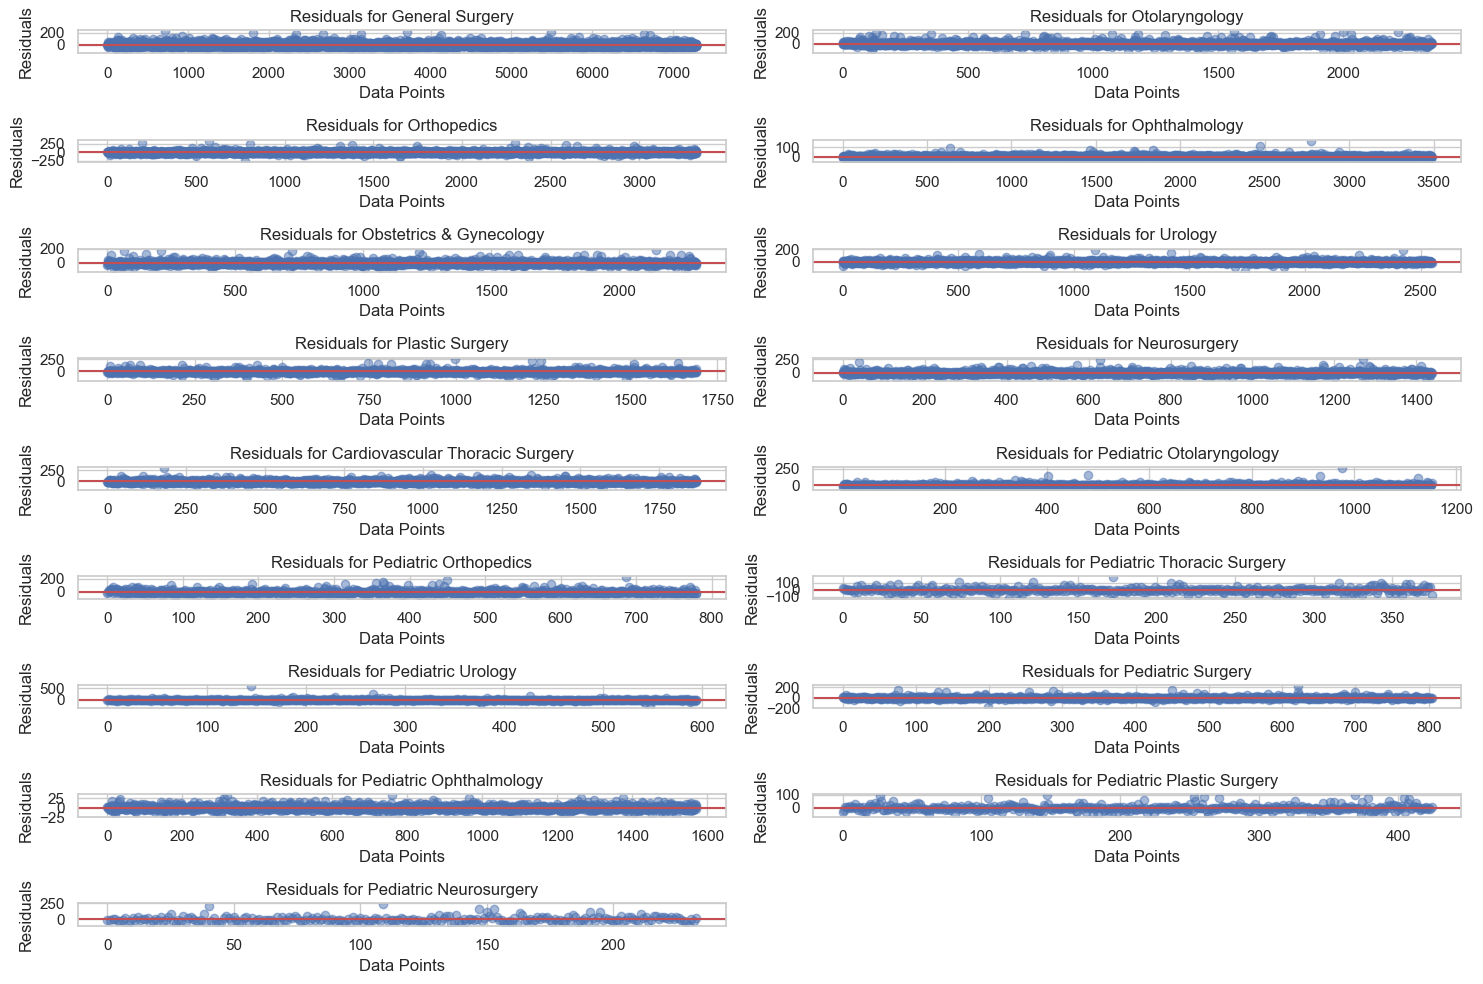

In [18]:
# Correcting the approach to calculate and plot residuals
residuals_corrected = {}
for dept, (X_test, y_test) in test_data.items():
    model = RandomForestRegressor(random_state=42)
    model.fit(X_test, y_test)  # Refitting the model on the test set for simplicity
    y_pred = model.predict(X_test)
    residuals_corrected[dept] = y_test - y_pred

# Plotting residuals for each department
plt.figure(figsize=(15, 10))
for i, (dept, residual) in enumerate(residuals_corrected.items()):
    plt.subplot(len(residuals_corrected) // 2 + len(residuals_corrected) % 2, 2, i + 1)
    plt.scatter(range(len(residual)), residual, alpha=0.5)
    plt.title(f'Residuals for {dept}')
    plt.xlabel('Data Points')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='-')

plt.tight_layout()
plt.show()



In [29]:
# Extracting department names from one-hot encoded columns
department_columns = [col for col in df_encoded.columns if col.startswith('surgical_department_')]
department_names = [col.replace('surgical_department_', '') for col in department_columns]

# Creating and training models for each department
ensemble_predictions = np.zeros(len(y_test_all))

# Using the full dataset model as the base model
model_full = RandomForestRegressor(random_state=42)
model_full.fit(X_train_all, y_train_all)
ensemble_predictions += model_full.predict(X_test_all)

# Updating predictions using department-specific models
for dept_name in department_names:
    # Constructing the full department column name
    dept_column = f'surgical_department_{dept_name}'

    # Filtering data for each department
    dept_indices_train = X_train_all[dept_column] == 1
    dept_indices_test = X_test_all[dept_column] == 1

    # Training a model only if there is data for the department in the training set
    if dept_indices_train.sum() > 0:
        dept_model = RandomForestRegressor(random_state=42)
        dept_model.fit(X_train_all[dept_indices_train], y_train_all[dept_indices_train])

        # Updating predictions for the department in the test set
        ensemble_predictions[dept_indices_test] = dept_model.predict(X_test_all[dept_indices_test])

# Evaluating the ensemble model
ensemble_mae = mean_absolute_error(y_test_all, ensemble_predictions)
ensemble_rmse = np.sqrt(mean_squared_error(y_test_all, ensemble_predictions))

ensemble_mae, ensemble_rmse



(33.59357526464872, 56.870945049983995)